# Regresión logística 

In [5]:
from sklearn.linear_model import LogisticRegression


In [6]:
import pickle
with open("prestamo.pkl", "rb") as f:
    X_prestamo_entrenamiento, y_prestamo_entrenamiento, X_prestamo_prueba, y_prestamo_prueba = pickle.load(f)

In [7]:
X_prestamo_entrenamiento.shape, y_prestamo_entrenamiento.shape

((2968, 13), (2968,))

In [8]:
X_prestamo_prueba.shape, y_prestamo_prueba.shape

((1273, 13), (1273,))

## Modelo de entrenamiento 

In [9]:
logistic_regression_prestamo = LogisticRegression(random_state=0)
logistic_regression_prestamo.fit(X_prestamo_entrenamiento,y_prestamo_entrenamiento)

LogisticRegression(random_state=0)

## Modelo de prueba

In [10]:
prevision = logistic_regression_prestamo.predict(X_prestamo_prueba)

In [11]:
prevision

array(['Approved', 'Approved', 'Approved', ..., 'Approved', 'Approved',
       'Rejected'], dtype=object)

In [12]:
y_prestamo_prueba

array(['Approved', 'Approved', 'Approved', ..., 'Approved', 'Approved',
       'Rejected'], dtype=object)

## Comparar el modelo de prueba con el modelo original
##### 0 - Approved       1 - Rejected

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

### Puntuación de precisión

In [15]:
accuracy_score(prevision,y_prestamo_prueba)

0.9065200314218381

In [16]:
confusion_matrix(prevision,y_prestamo_prueba)

array([[735,  67],
       [ 52, 419]], dtype=int64)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

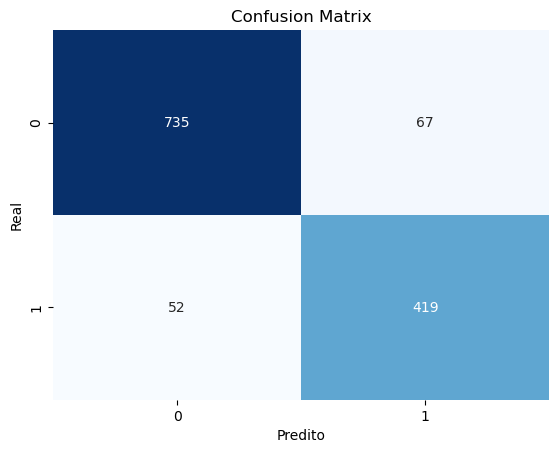

In [18]:
cm = confusion_matrix(prevision,y_prestamo_prueba)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

In [19]:
from yellowbrick.classifier import ConfusionMatrix

0.9065200314218381

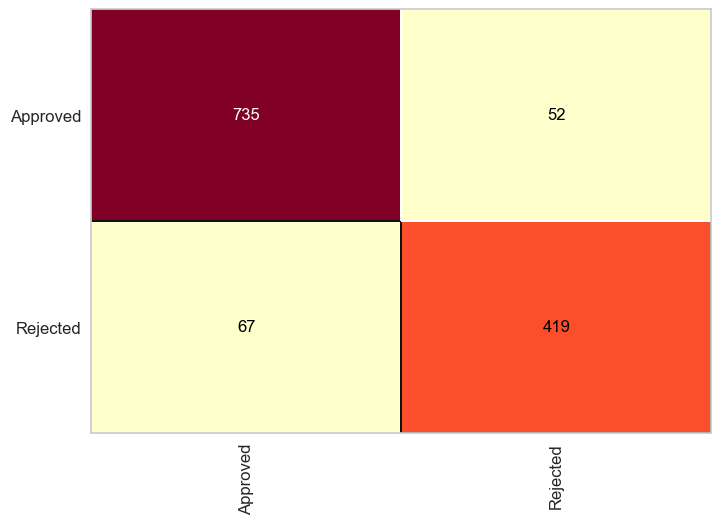

In [20]:
cm = ConfusionMatrix(logistic_regression_prestamo)
cm.fit(X_prestamo_entrenamiento,y_prestamo_entrenamiento)
cm.score(X_prestamo_prueba,y_prestamo_prueba)

In [21]:
print(classification_report(y_prestamo_prueba,prevision))

              precision    recall  f1-score   support

    Approved       0.92      0.93      0.93       787
    Rejected       0.89      0.86      0.88       486

    accuracy                           0.91      1273
   macro avg       0.90      0.90      0.90      1273
weighted avg       0.91      0.91      0.91      1273

